In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
with open('dataset/starwars/starwars-full-interactions-allCharacters-merged.json', 'r') as file:
    data = json.load(file)
G= nx.Graph()

# Prendiamo i nodi
for node in data['nodes']:
    G.add_node(node['name'], size=node['value'], color=node['colour'])

# Prendiamo gli archi
for link in data['links']:
    source = data['nodes'][link['source']]['name']
    target = data['nodes'][link['target']]['name']
    G.add_edge(source, target, weight=link['value'])

print("NODI: ", len(G.nodes))
print("ARCHI: ", len(G.edges))
print("DENSITA", nx.density(G))
#print("RAGGIO: ", nx.radius(G))
#print("DIAMETRO: ", nx.diameter(G))
#print("PERIFERIA: ", nx.periphery(G))
print("CLUSTERING: %0.3f" % nx.average_clustering(G))
print("IS CONNECTED: ", nx.is_connected(G))


NODI:  111
ARCHI:  444
DENSITA 0.07272727272727272
CLUSTERING: 0.692
IS CONNECTED:  False


## Plot di tutte le interazioni nell'intera saga

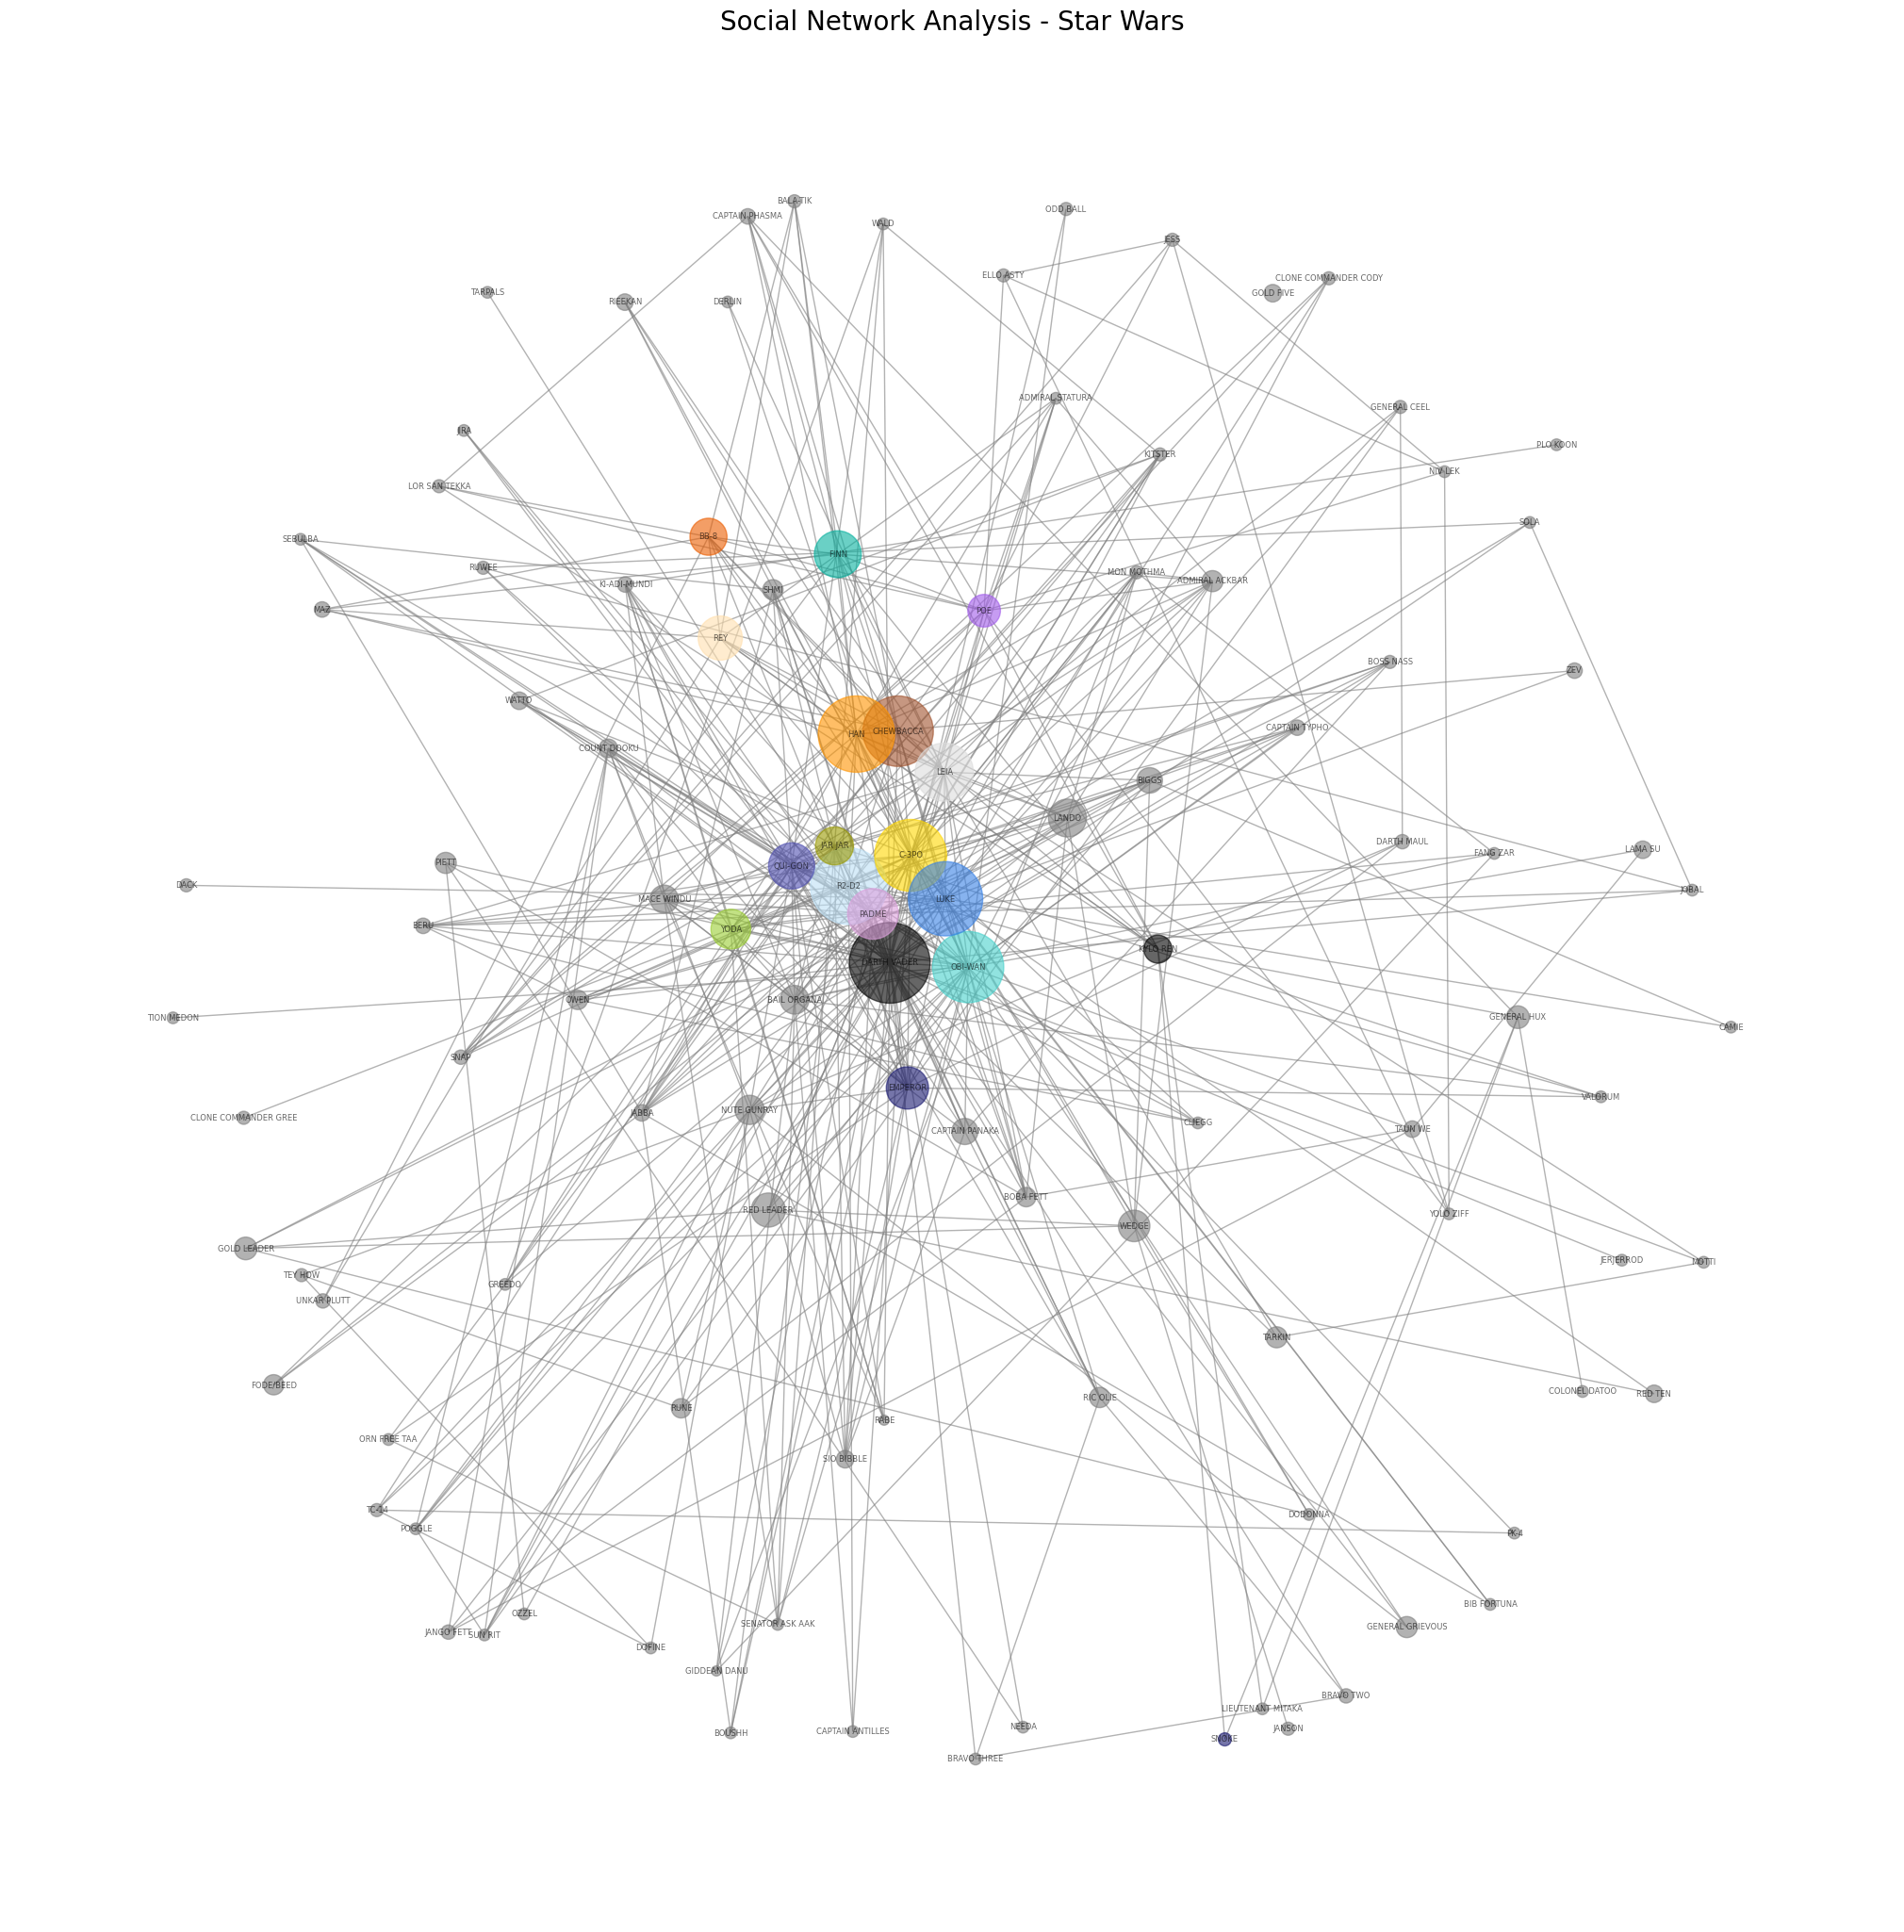

In [36]:
node_sizes = [G.nodes[node]['size'] * 20 for node in G.nodes()]  # Scala dei nodi
node_colors = [G.nodes[node]['color'] for node in G.nodes()]    # Colori nodi

plt.figure(figsize=(20, 20))  # Aumenta la dimensione della figura
pos = nx.spring_layout(G, seed=42, k=1.2)  # Aumenta la spaziatura con k

# Disegna il grafo
nx.draw(
    G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors,
    font_size=6, edge_color='gray', alpha=0.6  # Riduce il font e aggiunge trasparenza
)

plt.title("Social Network Analysis - Star Wars", fontsize=20)
plt.show()

## Lavoriamo sui protagonisti della saga

### Luke Skywalker

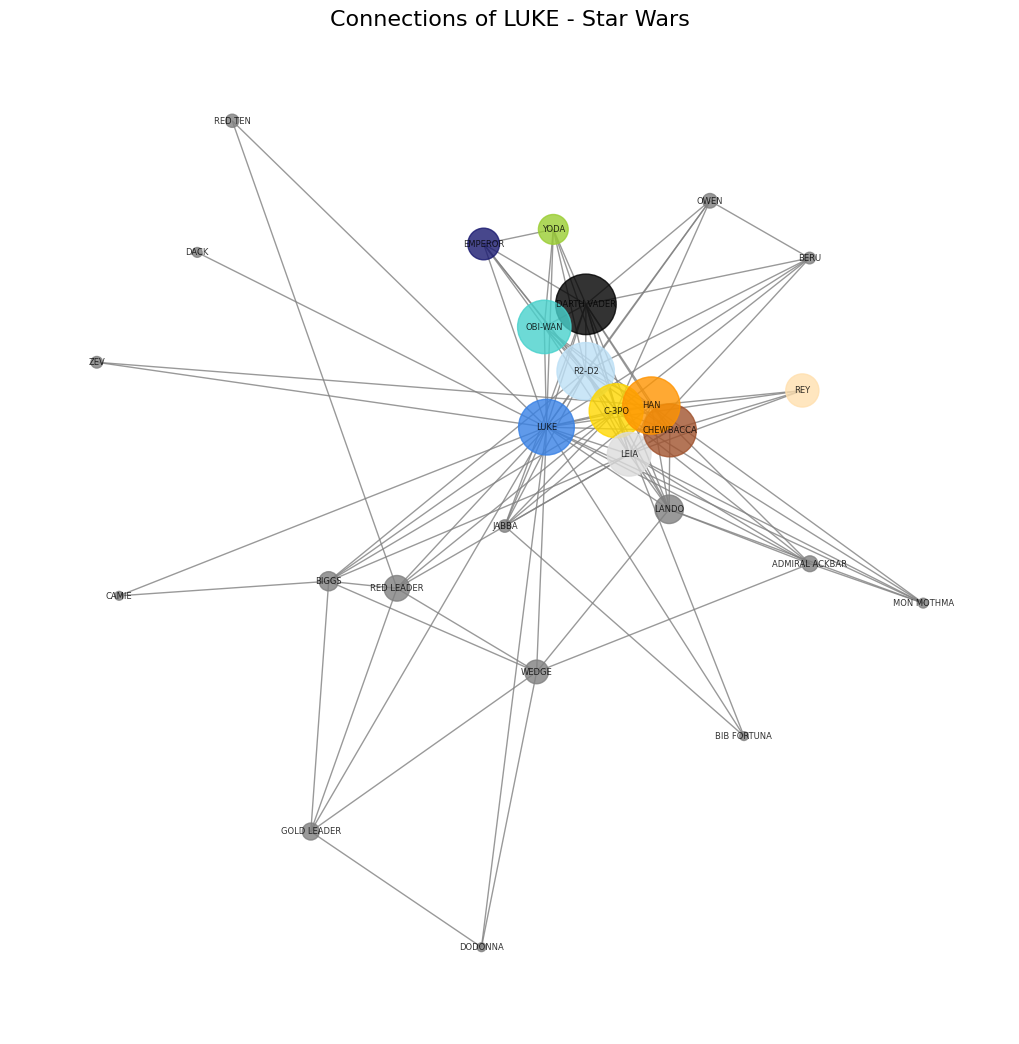

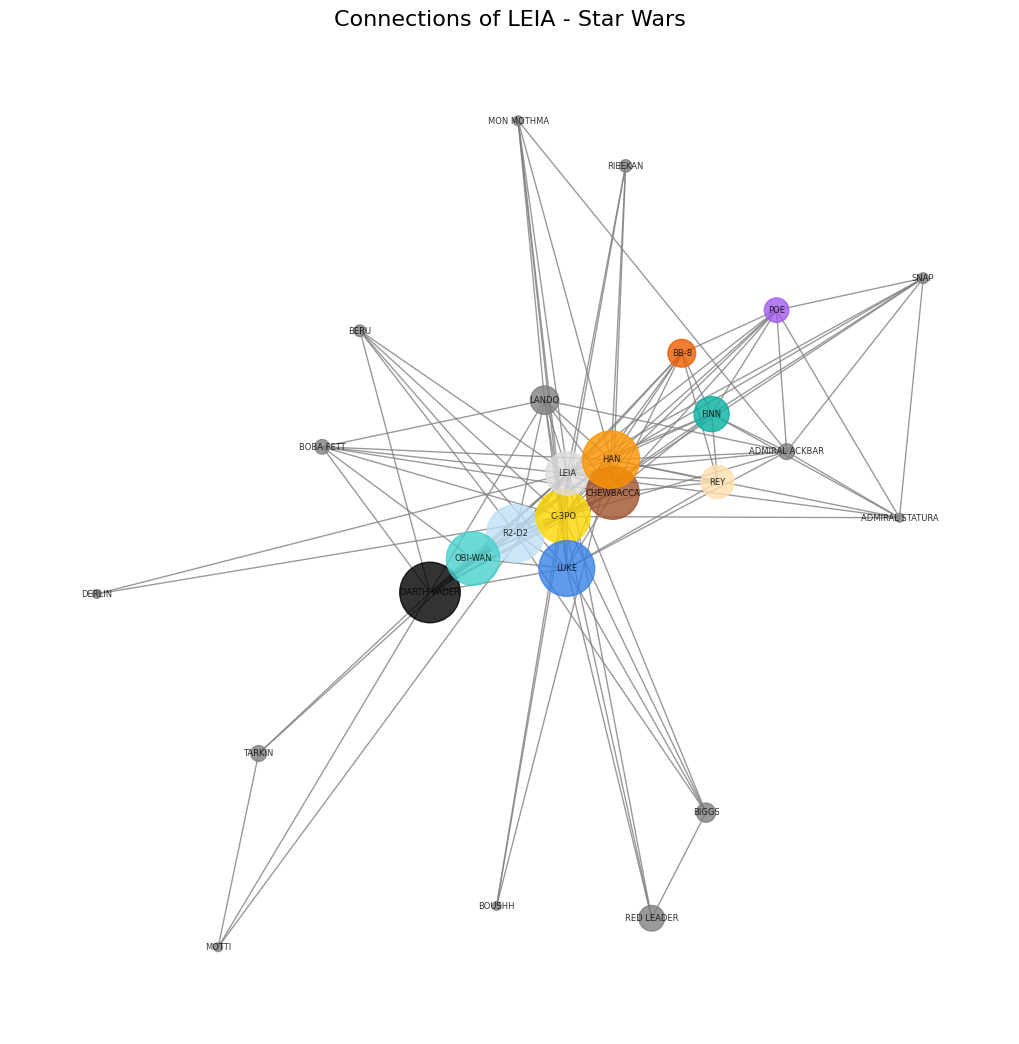

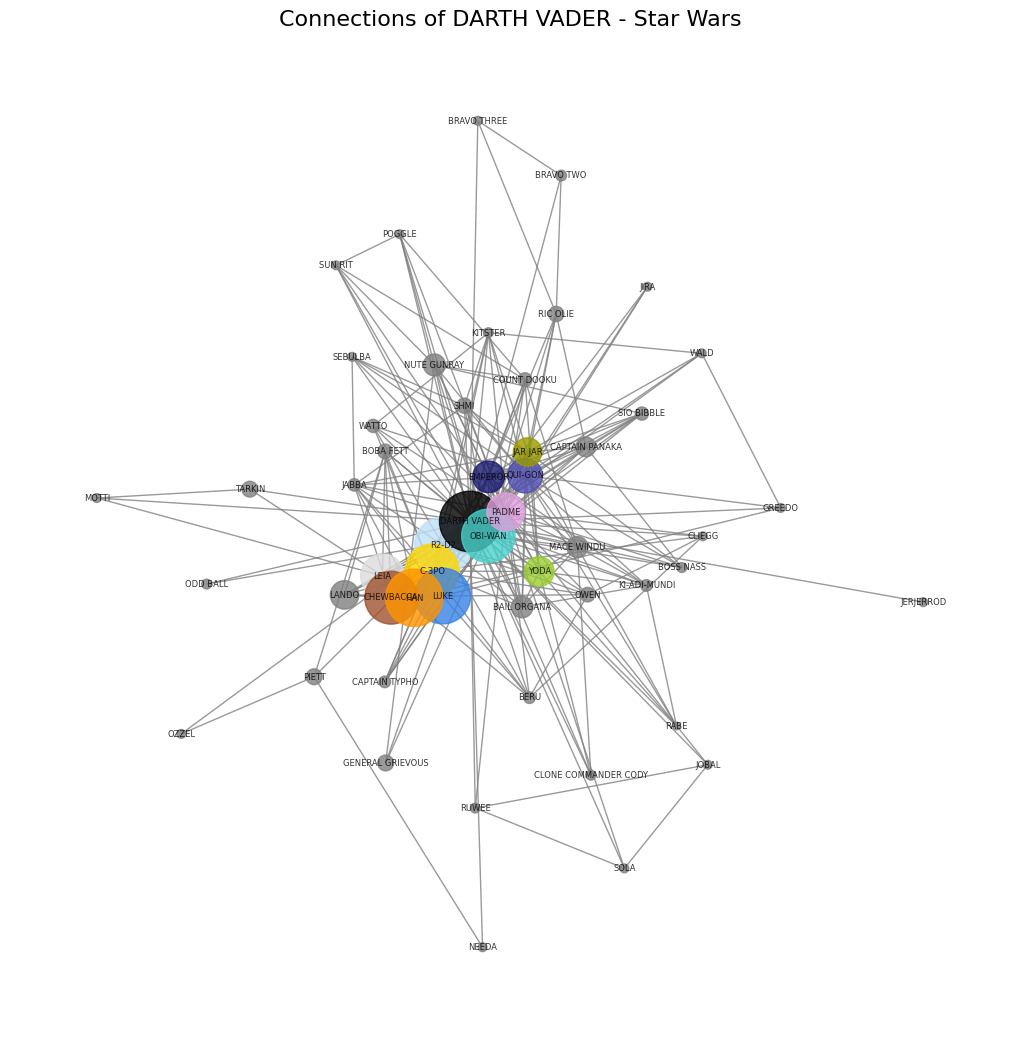

In [43]:
characters = ["LUKE", "LEIA", "DARTH VADER"]

for character in characters:
    if character in G:
        neighbors= list(G.neighbors(character)) 
        subgraph_nodes = [character] + neighbors
        subgraph = G.subgraph(subgraph_nodes)
        subgraph_node_sizes = [subgraph.nodes[node]['size'] * 10 for node in subgraph.nodes()]
        subgraph_node_colors = [subgraph.nodes[node]['color'] for node in subgraph.nodes()]
        plt.figure(figsize=(10, 10))
        pos = nx.spring_layout(subgraph, seed=42, k=0.8)
        nx.draw(
            subgraph, pos, with_labels=True, node_size=subgraph_node_sizes, 
            node_color=subgraph_node_colors, font_size=6, edge_color='gray', alpha=0.8
        )
        plt.title(f"Connections of {character} - Star Wars", fontsize=16)
        plt.show()
    else:
        print(f"The character '{character}' does not exist in the graph.")